In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('all_data.csv')
plt.rcParams['figure.dpi']= 150


In [3]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The goal of this analysis is to discover the correlation between a country's GDP and life expectancy. The only real significant other factor that needs to be considered is how life expectancy has changed over the period of time which the data was collected. So let us start with that.

Also should rename the life expectancy col because that's ridiculous

In [4]:
data.rename(columns={'Life expectancy at birth (years)': 'life_expectancy'}, inplace=True)
data.head()

,Country,Year,life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


4415702800.0


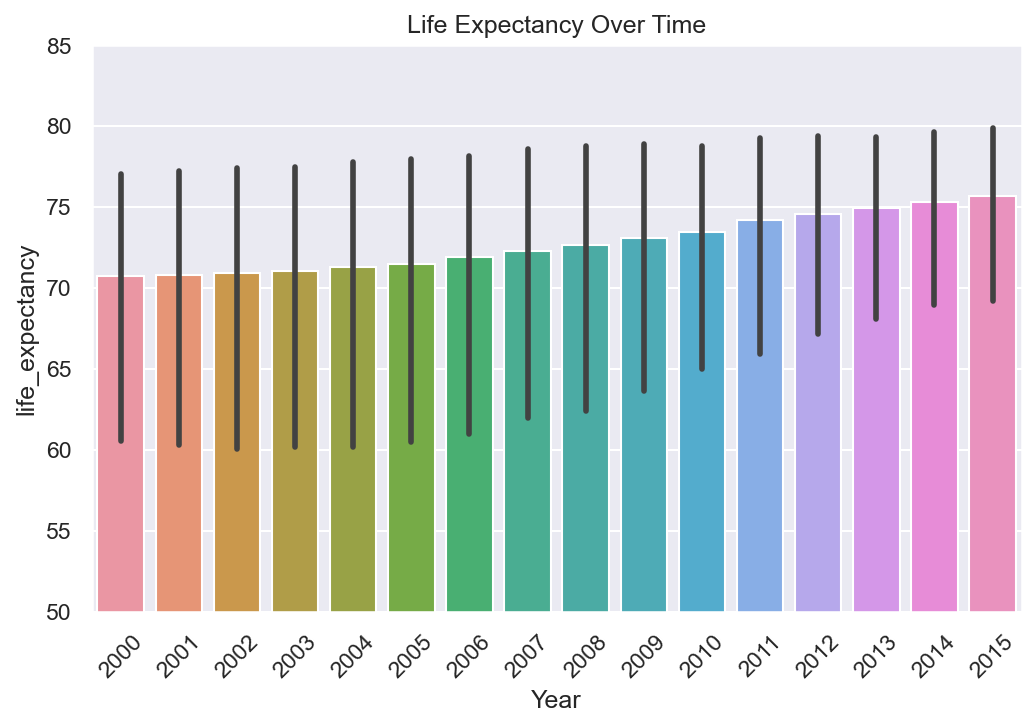

In [5]:
# print(min(data.Year)) # 2000
# print(max(data.Year)) # 2015
# print(data.Country.nunique()) # 6
print(data.GDP.min())

plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Year', y='life_expectancy')
ax = plt.subplot()
ax.set_xticklabels(data.Year.unique(), rotation=45)
plt.title('Life Expectancy Over Time')
plt.ylim(ymin=50, ymax=85)
plt.show()


So average life expectancy increases by about 5 years from 2000-2015, and we can see that the confidence intervals (represented by the vertical error bar wicks) become drastically smaller, likely due to less developed countries becoming closer in average life expectancy to the more developed ones. We can briefly visualize this below. 

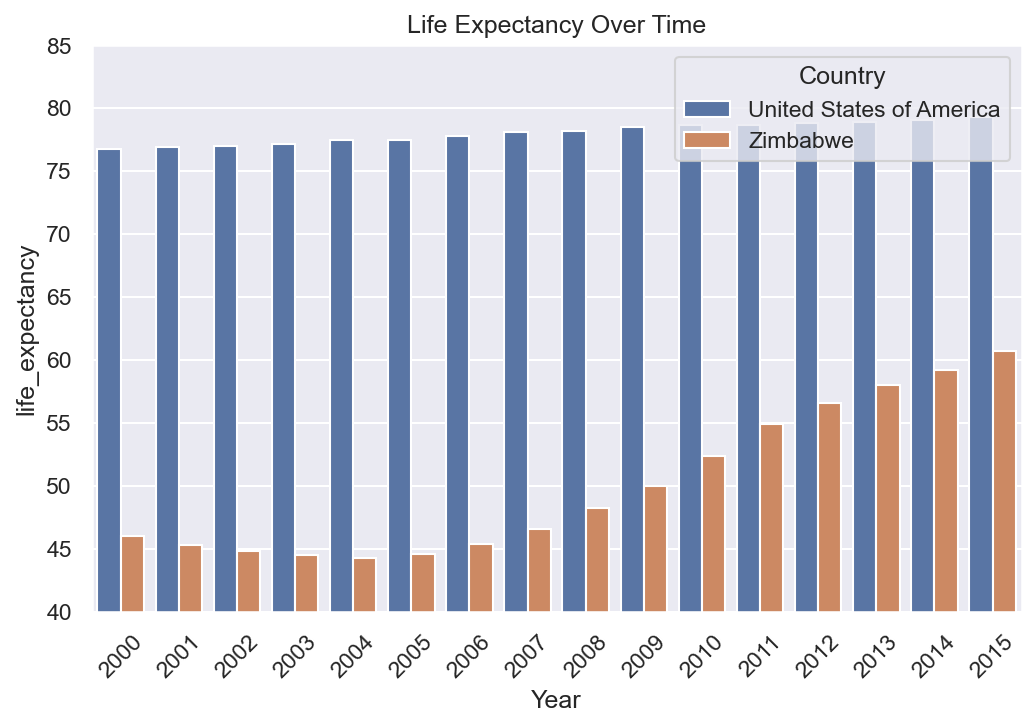

In [6]:
# print(data.Country.unique()) # ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

data2 = data[data.Country.isin(['Zimbabwe', 'United States of America'])]
plt.figure(figsize=(8,5))
sns.barplot(data=data2, x='Year', y='life_expectancy', hue='Country')
ax = plt.subplot()
ax.set_xticklabels(data.Year.unique(), rotation=45)
plt.title('Life Expectancy Over Time')
plt.ylim(ymin=40, ymax=85)
plt.show()


We can see how much of an impact this has on our overall data by removing Zimbabwe from the dataset as shown below.

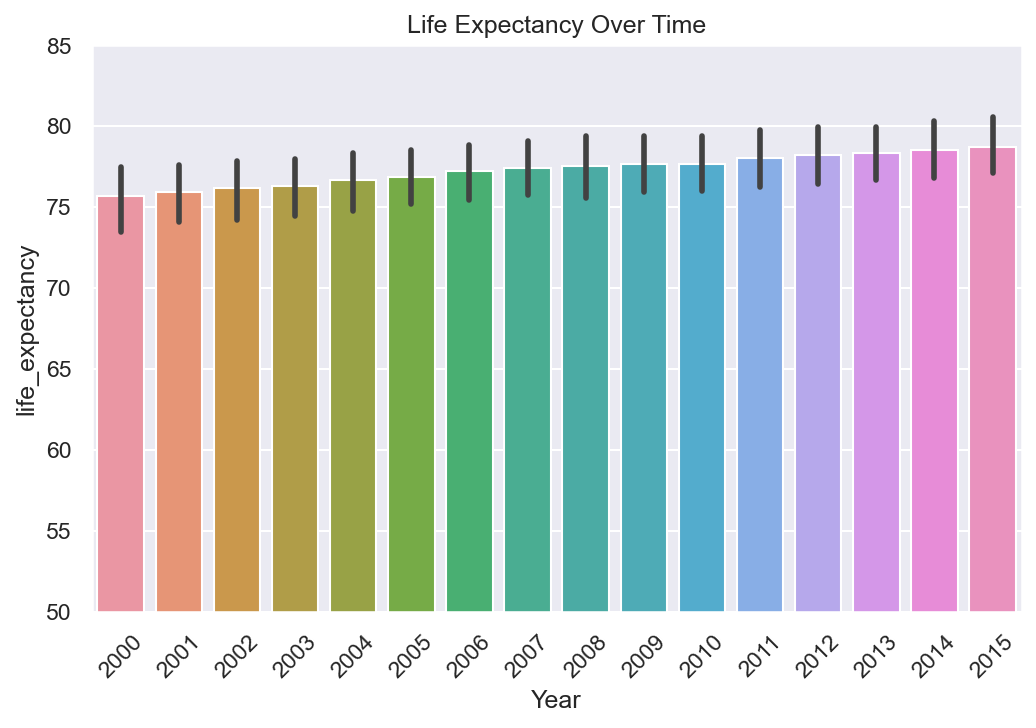

In [7]:

data3 = data[data.Country != 'Zimbabwe']
plt.figure(figsize=(8,5))
sns.barplot(data=data3, x='Year', y='life_expectancy')
ax = plt.subplot()
ax.set_xticklabels(data.Year.unique(), rotation=45)
plt.title('Life Expectancy Over Time')
plt.ylim(ymin=50, ymax=85)
plt.show()

Next we can look at how GDP has changed over time for each of the following countries.

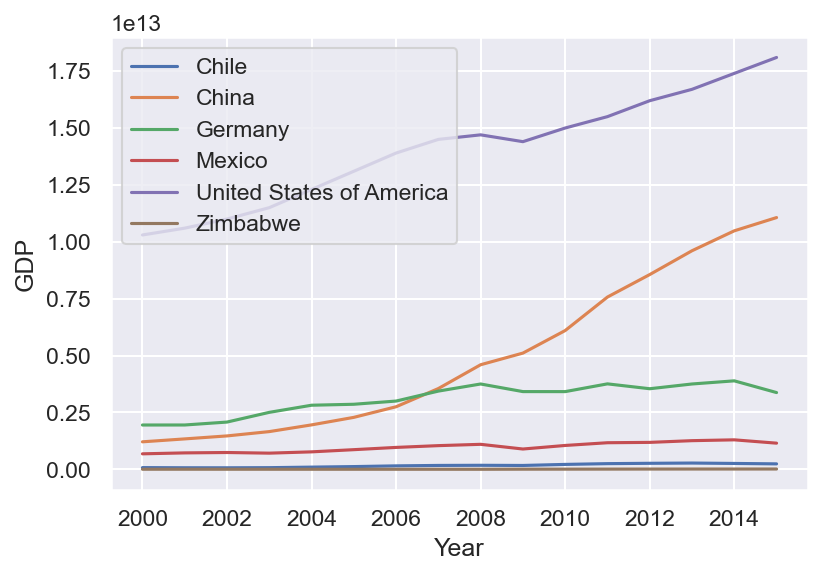

In [8]:
#plt.figure(figsize=(7,4))
chart = sns.lineplot(data=data, x='Year', y='GDP', hue='Country', legend='full')
chart.legend(loc='upper left')


This is hard to interpret, so let's look at GDP growth over time. 

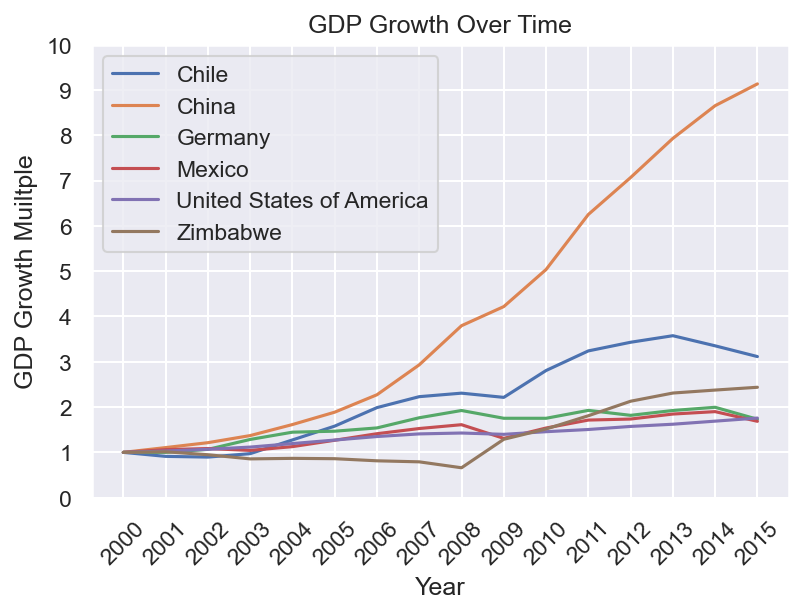

In [11]:
for country in data.Country.unique():
    df = data.loc[data.Country==country].copy()
    df['gdp_growth'] = df.GDP / df.GDP.iloc[0]
    plt.plot(df.Year, df.gdp_growth)
plt.title('GDP Growth Over Time')
plt.xlabel('Year')
ax = plt.subplot()
ax.set_xticks(range(2000, 2016))
ax.set_xticklabels(labels=range(2000,2016), rotation=45)
ax.set_yticks(range(11))
plt.ylabel('GDP Growth Muiltple')
plt.legend(data.Country.unique())
plt.show()


In [10]:
print(data.head())
print(data.life_expectancy.iloc[2])

  Country  Year  life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10
77.8


Text(0.5, 1.0, 'GDP vs Life Expectancy')

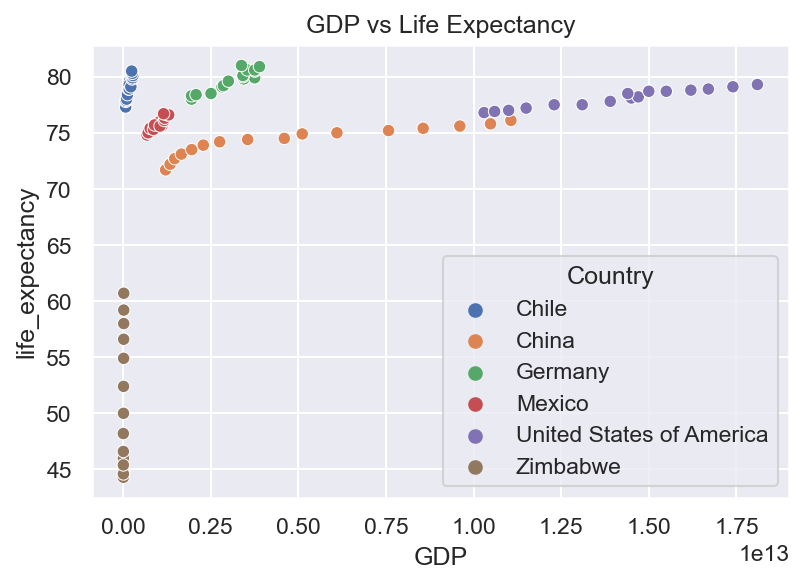

In [16]:
# log_data = data.copy()
# log_data['log_gdp'] = np.log(log_data.GDP)
sns.scatterplot(data=data, x='GDP', y='life_expectancy', hue='Country')
plt.title('GDP vs Life Expectancy')

So cleary there is a positive relationship between GDP and life expectancy, and we can try to use a log scale for GDP to better visualize the data above, however I think it would be more useful if we plotted Zimbabwe separately from the rest of the countries.

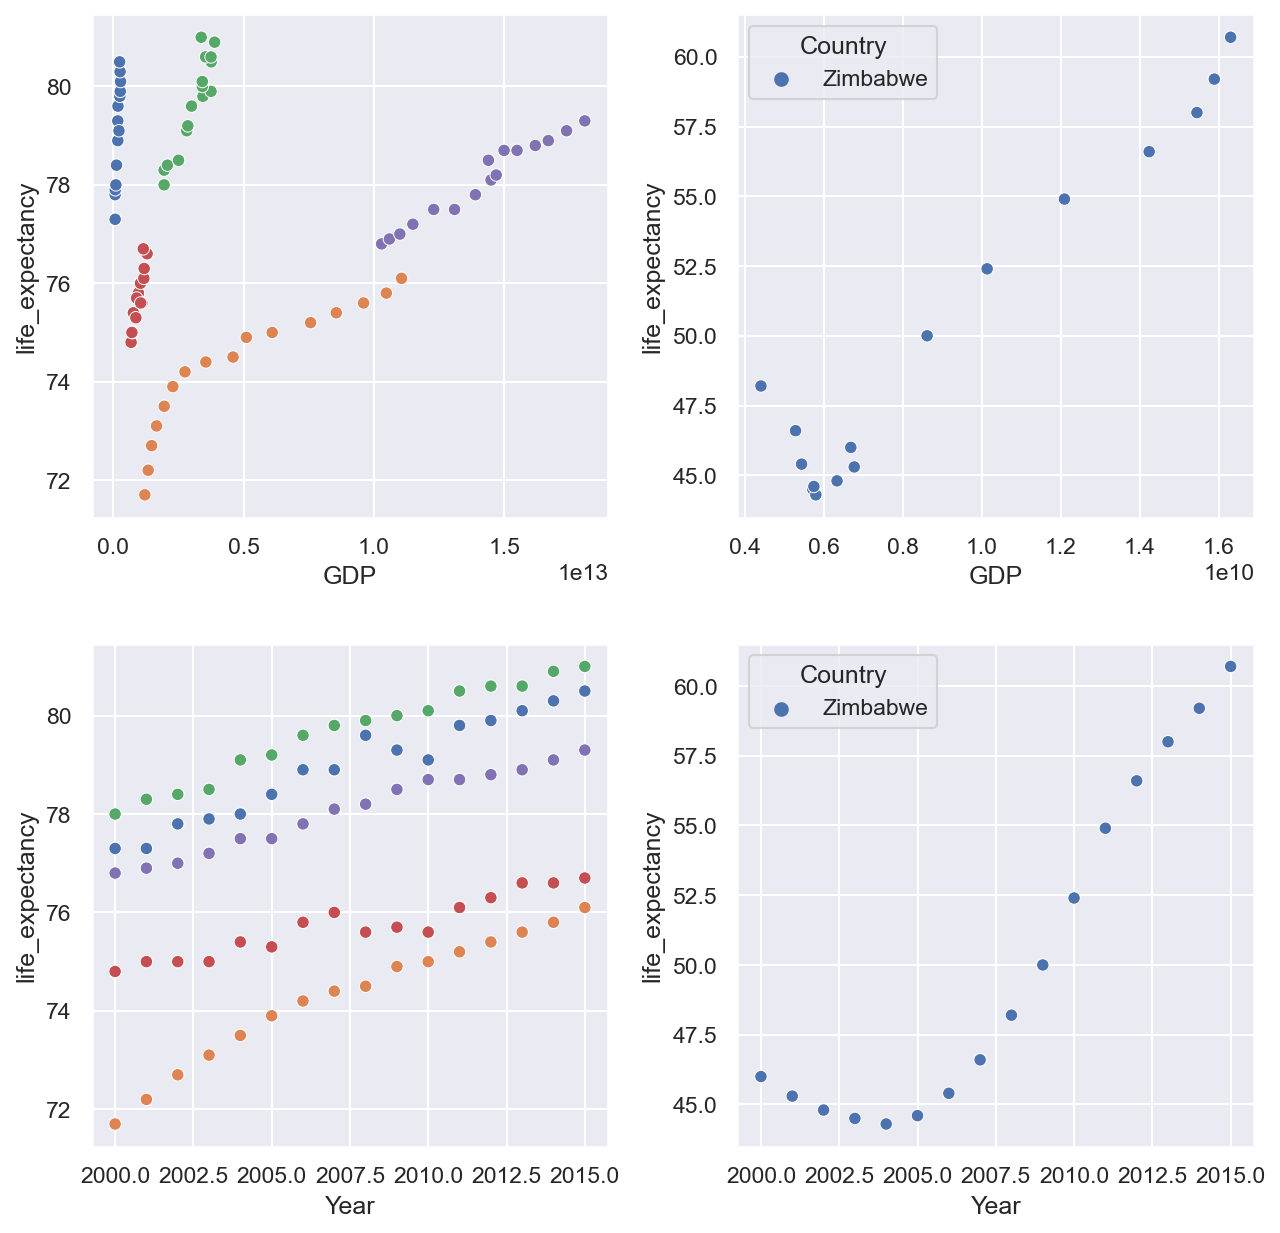

In [40]:
not_zim = data[data.Country!='Zimbabwe'].copy()
fig, ax = plt.subplots(2,2)
sns.scatterplot(data=not_zim, x='GDP', y='life_expectancy', hue='Country', ax=ax[0,0], legend=None)
sns.scatterplot(data=data[data.Country=='Zimbabwe'], x='GDP', y='life_expectancy', hue='Country', ax=ax[0,1])
sns.scatterplot(data=not_zim, x='Year', y='life_expectancy', hue='Country', ax=ax[1,0], legend=None)
sns.scatterplot(data=data[data.Country=='Zimbabwe'], x='Year', y='life_expectancy', hue='Country', ax=ax[1,1])
fig.subplots_adjust(wspace=0.25, hspace=0.25)
fig.set_figheight(10)
fig.set_figwidth(10)
#fig.show()

From these charts we can clearly see that both Year and GDP are positively correlated with life expectancy, though it is difficult from these charts alone to determine which variable is more significant, especially considering that countless other variables that would to be considered when modeling an accurate predictor of life expectancy. 

It is also sensible to view life expectancy as a predictor of GDP, as a higher life expectancy would likely indicate a larger population of older individuals that likely have more money to spend. 

To conclude, just from the plots above, we can see that year is likely the most accurate predictor of life expectancy for a given country. Each country's life expectancy could very reasonably be predicted with a simple linear regression model.